In [1]:
## imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data_folder = "data/"
train_file = data_folder + "train.csv"
test_file = data_folder + "test.csv"

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

In [3]:
## features
print(train.columns)

Index(['Total population', 'Median age', '% BachelorsDeg or higher',
       'Unemployment rate', 'Per capita income', 'Total households',
       'Average household size', '% Owner occupied housing',
       '% Renter occupied housing', '% Vacant housing', 'Median home value',
       'Population growth', 'House hold growth', 'Per capita income growth',
       'Winner'],
      dtype='object')


In [4]:
## create a binary target
train['Win_bin'] = (train['Winner'] == 'Barack Obama')
train.drop(['Winner'], axis=1, inplace=True)

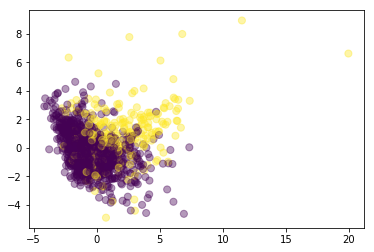

In [15]:
## visualizing the data through PCA

from sklearn.preprocessing import scale
train_scaled = scale(train)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
## explained variance
#print(pca.score)
pca.fit(train_scaled)
train_pca = pca.transform(train_scaled)
train_pca.shape
plt.scatter(train_pca[:, 0], train_pca[:, 1] , c = train['Win_bin'] , s = 50 , alpha=0.4);


In [13]:
train.corr()

,Total population,Median age,% BachelorsDeg or higher,Unemployment rate,Per capita income,Total households,Average household size,% Owner occupied housing,% Renter occupied housing,% Vacant housing,Median home value,Population growth,House hold growth,Per capita income growth,Win_bin
Total population,1.000000,-0.179842,0.267151,0.083925,0.274855,0.994992,0.191657,-0.086420,0.358905,-0.186357,0.290881,0.159999,0.143291,0.134223,0.232607
Median age,-0.179842,1.000000,-0.182898,-0.220873,0.036927,-0.178936,-0.676673,-0.041166,-0.562690,0.447542,-0.100441,-0.338586,-0.332764,-0.005695,-0.226913
% BachelorsDeg or higher,0.267151,-0.182898,1.000000,-0.277026,0.788763,0.298571,-0.023599,-0.151016,0.423733,-0.176493,0.691869,0.340778,0.335679,0.328480,0.336988
Unemployment rate,0.083925,-0.220873,-0.277026,1.000000,-0.205134,0.085252,0.186875,-0.034788,0.077242,-0.025829,-0.093694,0.047102,0.047713,-0.018894,0.170396
Per capita income,0.274855,0.036927,0.788763,-0.205134,1.000000,0.312214,-0.066000,0.108114,0.225847,-0.260492,0.746872,0.334783,0.328446,0.373711,0.220738
Total households,0.994992,-0.178936,0.298571,0.085252,0.312214,1.000000,0.170994,-0.094171,0.385043,-0.198625,0.309211,0.166545,0.149367,0.143377,0.251743
Average household size,0.191657,-0.676673,-0.023599,0.186875,-0.066000,0.170994,1.000000,0.216316,0.140015,-0.293017,0.123791,0.395048,0.374286,0.028429,0.080706
% Owner occupied housing,-0.086420,-0.041166,-0.151016,-0.034788,0.108114,-0.094171,0.216316,1.000000,-0.241801,-0.705130,-0.114552,0.191237,0.201852,-0.118409,-0.234671
% Renter occupied housing,0.358905,-0.562690,0.423733,0.077242,0.225847,0.385043,0.140015,-0.241801,1.000000,-0.517519,0.306816,0.176600,0.161960,0.189405,0.372124
% Vacant housing,-0.186357,0.447542,-0.176493,-0.025829,-0.260492,-0.198625,-0.293017,-0.705130,-0.517519,1.000000,-0.123245,-0.297834,-0.296504,-0.034057,-0.065102
